In [5]:
import numpy as np
import functions as func
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.wcs import WCS
import pdb, glob, mpld3

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

## Magnitude Test

In [4]:
phot_table = ascii.read('ap_phot_pipeline_results/N2420_dt_20180802.csv')
src_star   = ascii.read('../g_starsNGC2420.csv')

In [6]:
mask = np.where(phot_table['Star1_Res'] != 0.0)
phot_table['Star1_Res'][mask]

8.08444236793
7.70595496755
8.02520158933
8.27214074403
7.84463733879
8.02046128572
10.6336166118
8.37482519475
8.05024880888
7.94895014996
8.02019391382


In [35]:
flux = []
for sname in phot_table.colnames[3::2]:
    mask = np.where(phot_table[sname] != 0.0)
    flux.append(np.nanmean(phot_table[sname][mask]))

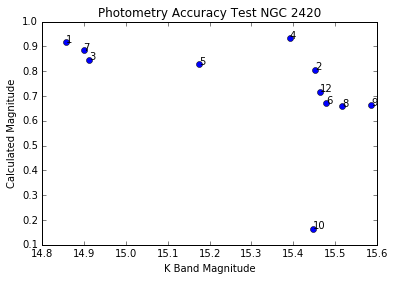

In [63]:
calc_mag = np.log10(flux)
k_mag    = src_star['K mag']

fig, ax = plt.subplots()
ax.plot(k_mag, calc_mag, 'o')
ax.set_xlabel('K Band Magnitude')
ax.set_ylabel('Calculated Magnitude')
ax.set_title('Photometry Accuracy Test NGC 2420')

labels = ['%i' % (i+1) for i in range(len(k_mag))]
for i, labels in enumerate(labels):
    ax.annotate(labels, (k_mag[i], calc_mag[i]))
plt.savefig('mag-mag plot.png')

## Center Test

In [ ]:
fnames_2506  = np.sort(glob.glob("../ngc2506/unzipped_AORs/ch1/bcd/*_bcd.fits"))
src_crd_2506 = np.load('sky_coord_ngc2506.npy')

for fname in fnames_2506[1::2]:
    hdu    = fits.open(bcd)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    src_pixcrd = w.wcs_world2pix(src_crd_2506,1)
    
    count = 0
    useful_pix = []
    for pix in src_pixcrd:
        if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
            useful_pix.append(pix)
            count += 1
    
    if count>0:
        fig, ax = plt.subplots(count, 1)
    
    for pix in useful_pix:
        cenX, cenY = func.gen_center_g2d(pix[0], pix[1], 3, 5, 4, 4, 0, image, model_plotting = True)
        
    

## BCD vs. CBCD

In [6]:
bcd  = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r*/ch1/bcd/*_bcd.fits'))
cbcd = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r*/ch1/bcd/*_cbcd.fits'))
len(bcd), len(cbcd)

(19742, 7524)

## Outlier rejection test

In [1]:
import sep_aor_flux_gen as sep

In [2]:
pixLen  = 1.221 #arcsec
pixArea = pixLen**2 #arcsec^2
pixArea = pixArea/(206265**2)

In [7]:
AORnames = np.sort(glob.glob('/data1/phot_cal/spitzer/hd165459/cryo/r*/'))
AORs = []

for aor in AORnames:
    fnames = np.sort(glob.glob(aor + 'ch1/bcd/*_bcd.fits'))
    AORs.append(fnames)

## Time Series Plotting

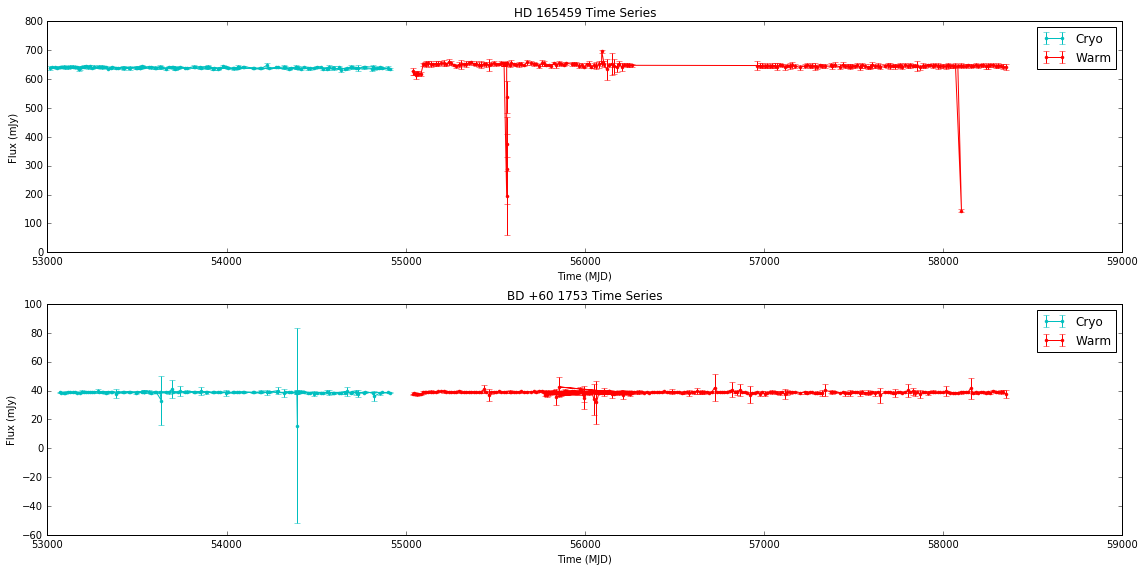

In [29]:
run5 = ascii.read('Reduction_Data_&_Logs/run5_aor_data.csv') # Hd cryo
run6 = ascii.read('Reduction_Data_&_Logs/run6_aor_data.csv') # Hd warm
run7 = ascii.read('Reduction_Data_&_Logs/run7_aor_data.csv') # Bd cryo
run8 = ascii.read('Reduction_Data_&_Logs/run8_aor_data.csv') # Bd warm

plt.subplot(211)
plt.errorbar(run5['Time (MJD)'], run5['Flux (mJy)'], yerr = run5['Error (mJy)'], fmt = 'c.-', label = 'Cryo')
plt.errorbar(run6['Time (MJD)'], run6['Flux (mJy)'], yerr = run6['Error (mJy)'], fmt = 'r.-', label = 'Warm')
plt.legend(loc = 'best')
plt.title('HD 165459 Time Series')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux (mJy)')

plt.subplot(212)
plt.errorbar(run7['Time (MJD)'], run7['Flux (mJy)'], yerr = run7['Error (mJy)'], fmt = 'c.-', label = 'Cryo')
plt.errorbar(run8['Time (MJD)'], run8['Flux (mJy)'], yerr = run8['Error (mJy)'], fmt = 'r.-', label = 'Warm')
plt.legend(loc = 'best')
plt.title('BD +60 1753 Time Series')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux (mJy)')

plt.tight_layout()
plt.savefig('General_Plots/calStars_ch1.pdf')

In [23]:
def perfect_dither(table, ftime):
    mask = (table['Cycling DPattern'] == 'YES') & (table['DScale'] == 'large') & (table['DPosition'] == '5') & (table['FTime (sec)'] == ftime)
    return table[mask]
perfect_dither(run7, 2.0)

AORKEY,DateObs,Cycling DPattern,DScale,DPosition,FTime (sec),Time (MJD),Flux (mJy),Error (mJy),Spread (%),Outliers Rejected
int64,str23,str3,str5,str2,float64,float64,float64,float64,float64,int64
24408320,2007-10-22T19:49:41.224,YES,large,5,2.0,54395.8261716,15.5977198601,67.4855548701,432.66294994,0
24409856,2007-10-22T19:45:03.232,YES,large,5,2.0,54395.8229541,38.5992211163,0.818177319516,2.11967313291,0
24428032,2007-11-13T03:00:32.746,YES,large,5,2.0,54417.125379,39.304031442,0.97206672356,2.47319851907,0
24429568,2007-11-26T15:19:44.937,YES,large,5,2.0,54430.6387145,39.008075937,0.480994527983,1.23306396542,0
24599808,2007-12-22T07:04:49.155,YES,large,5,2.0,54456.2950134,38.4666121473,0.601085817748,1.56261699223,0
24601344,2007-12-31T23:36:33.104,YES,large,5,2.0,54465.9837165,38.6431462144,0.311183817219,0.8052755733,0


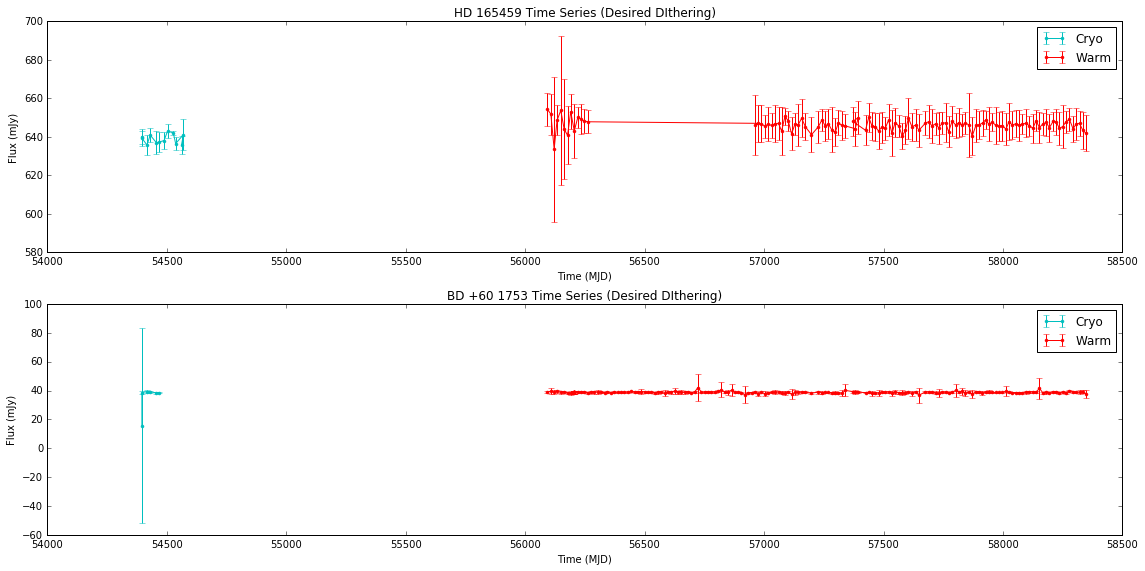

In [30]:
run5 = perfect_dither(run5, 0.4) # Hd cryo
run6 = perfect_dither(run6, 0.4)
run7 = perfect_dither(run7, 2.0)
run8 = perfect_dither(run8, 2.0)

plt.subplot(211)
plt.errorbar(run5['Time (MJD)'], run5['Flux (mJy)'], yerr = run5['Error (mJy)'], fmt = 'c.-', label = 'Cryo')
plt.errorbar(run6['Time (MJD)'], run6['Flux (mJy)'], yerr = run6['Error (mJy)'], fmt = 'r.-', label = 'Warm')
plt.legend(loc = 'best')
plt.title('HD 165459 Time Series (Desired DIthering)')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux (mJy)')

plt.subplot(212)
plt.errorbar(run7['Time (MJD)'], run7['Flux (mJy)'], yerr = run7['Error (mJy)'], fmt = 'c.-', label = 'Cryo')
plt.errorbar(run8['Time (MJD)'], run8['Flux (mJy)'], yerr = run8['Error (mJy)'], fmt = 'r.-', label = 'Warm')
plt.legend(loc = 'best')
plt.title('BD +60 1753 Time Series (Desired DIthering)')
plt.xlabel('Time (MJD)')
plt.ylabel('Flux (mJy)')

plt.tight_layout()
plt.savefig('General_Plots/calStars_ch1_pDith.pdf')